# Binary Classification & Machine Learning: Model Training and Validation
***
## Essential Libraries
Let us begin by importing essential libraries
> NumPy : Library for Numeric Computations in Python  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
# import basic libraries


In [1]:
# import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb
sb.set() # set the default Seaborn style for graphics

In [2]:
# import the datasets
steam = pd.read_csv('Cleaned/steam_cleaned.csv')
print('Number of Rows: {}'.format(steam.shape[0]))
print('Number of Columns: {}'.format(steam.shape[1]))
steam.head()

Number of Rows: 62057
Number of Columns: 16


,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,01/11/2000,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,229766,5992,9847,169,10000000-20000000,10.00
1,20,Team Fortress Classic,01/04/1999,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,7005,1069,167,25,5000000-10000000,5.25
2,30,Day of Defeat,01/05/2003,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled;Family S...,Action,FPS;World War II;Multiplayer,6036,664,553,17,5000000-10000000,5.25
3,40,Deathmatch Classic,01/06/2001,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Classic,2415,511,70,13,5000000-10000000,5.25
4,50,Half-Life: Opposing Force,01/11/1999,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Classic,20697,1054,406,157,2000000-5000000,5.25


In [3]:
steam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62057 entries, 0 to 62056
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             62057 non-null  int64  
 1   name              62057 non-null  object 
 2   release_date      62057 non-null  object 
 3   english           62057 non-null  int64  
 4   developer         62057 non-null  object 
 5   publisher         62056 non-null  object 
 6   platforms         62057 non-null  object 
 7   categories        62057 non-null  object 
 8   genres            62057 non-null  object 
 9   steamspy_tags     62057 non-null  object 
 10  positive_ratings  62057 non-null  int64  
 11  negative_ratings  62057 non-null  int64  
 12  average_playtime  62057 non-null  int64  
 13  median_playtime   62057 non-null  int64  
 14  owners            62057 non-null  object 
 15  price             62057 non-null  float64
dtypes: float64(1), int64(6), object(9)
memor

***
# Binary Classification: Predicting the Success of a Steam Game 

# Establishing Success Score
> **Sucess Score**: `rating` equal or above 0.8
- Games with < 0.8 will be considered unsuccessful 
- Games with => 0.8 will be considered successful
- Games with a positive ratings ratio equal to or above 0.8 are labeled as "successful" (1), indicating a high level of positive reception.
- Conversely, games with a positive ratings ratio below 0.8 are labeled as "less successful" (0), indicating a comparatively lower level of positive reception

In [4]:
# Calculate success score
steam['success_score'] = (steam['positive_ratings'] / (steam['positive_ratings'] + steam['negative_ratings']))

# Calculate median success score
success_threshold = steam['success_score'].median()

# Assign binary labels based on success score and median threshold
steam['rating'] = (steam['success_score'] >= success_threshold).astype(int)

In [5]:
steam.head()

,appid,name,release_date,english,developer,publisher,platforms,categories,genres,steamspy_tags,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price,success_score,rating
0,10,Counter-Strike,01/11/2000,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,229766,5992,9847,169,10000000-20000000,10.00,0.974584,1
1,20,Team Fortress Classic,01/04/1999,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Multiplayer,7005,1069,167,25,5000000-10000000,5.25,0.867600,1
2,30,Day of Defeat,01/05/2003,1,Valve,Valve,windows;mac;linux,Multi-player;Valve Anti-Cheat enabled;Family S...,Action,FPS;World War II;Multiplayer,6036,664,553,17,5000000-10000000,5.25,0.900896,1
3,40,Deathmatch Classic,01/06/2001,1,Valve,Valve,windows;mac;linux,Multi-player;PvP;Online PvP;Shared/Split Scree...,Action,Action;FPS;Classic,2415,511,70,13,5000000-10000000,5.25,0.825359,1
4,50,Half-Life: Opposing Force,01/11/1999,1,Gearbox Software,Valve,windows;mac;linux,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Classic,20697,1054,406,157,2000000-5000000,5.25,0.951542,1


# Feature Engineering: Narrow Down Features in relation to Success Score  (Further EDA)
Further explore current features and create new features from your existing data that might improve the performance of your prediciting the success of Steam Games. This could involve transforming our existing features, creating interaction terms, or engineering new features based on domain knowledge.
***
**Success Score**:
- Games with a positive ratings ratio above or equal to the median are labeled as "successful" (1), indicating a high level of positive reception.
- Conversely, games with a positive ratings ratio below the median are labeled as "less successful" (0), indicating a comparatively lower level of positive reception.


In [6]:
ML_Set = steam.copy() #A copy of the data for visuallisation

# Relationship of `release_date` with Success Score

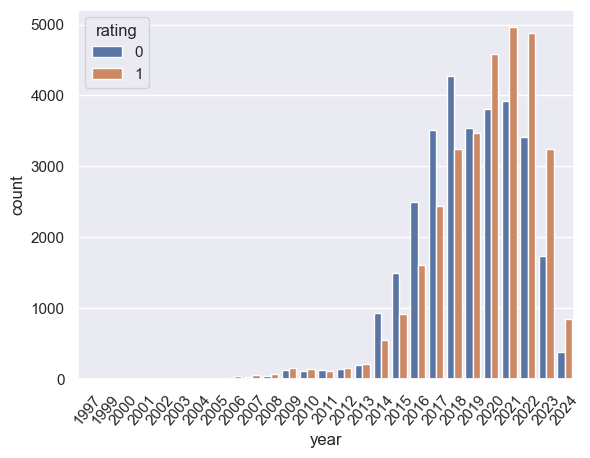

In [7]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

# Visualize release day, month, year, and total ratings
ML_Set['release_date'] = pd.to_datetime(ML_Set['release_date'])
ML_Set['year'], ML_Set['month'], ML_Set['day'] = ML_Set['release_date'].dt.year, \
                                                        ML_Set['release_date'].dt.month, \
                                                        ML_Set['release_date'].dt.day

# Rotate x-axis labels
plt.xticks(rotation=50)

# Year and total ratings
sns.countplot(x='year', hue='rating', data=ML_Set)
plt.show()

### Analysis:
- Games relesased in 2019 and onwards has more "High Ratings" than "Low Ratings"

# Relationship of the Reputation of the `developer` with Success Score
**Developer Reputation**: This might be trickier. But we could potentially create a score based on past successful games from the developer.

### Objective:
The objective here is to investigate how the reputation of game developers, specifically the top developers, correlates with the total ratings of games.
### Approach:
- **Grouping by Developer**: The data is grouped by developer, and the total ratings for each developer are calculated.
- **Identifying Top Developers**: Developers are sorted based on their total ratings, and the top 250 developers are selected.
- **Marking Games**: Games developed by the top developers are identified and marked.
- **Visualization**: A count plot is used to visualize the relationship between developer reputation (top developers vs. others) and total ratings.

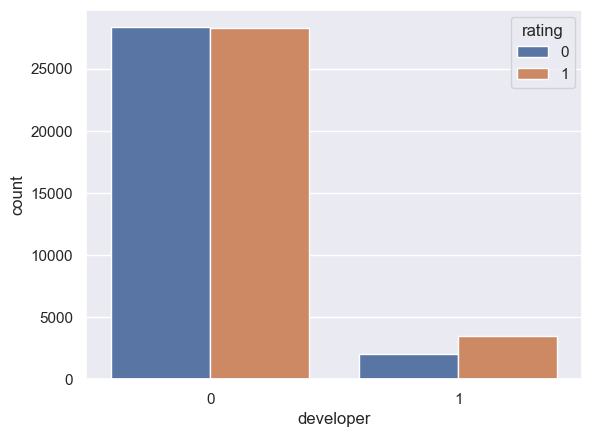

In [8]:
# Group the data by developer and calculate total ratings for each developer
developer_ratings = ML_Set.groupby('developer')['rating'].sum()

# Sort developers based on total ratings
top_developers = developer_ratings.sort_values(ascending=False).head(250)

# Get the list of top developers
top_dev = top_developers.index.tolist()

# Mark games developed by top developers
ML_Set['developer'] = ML_Set['developer'].apply(lambda x: any([developer in x for developer in top_dev])).astype(int)

# Visualize developer with total ratings
sns.countplot(x='developer', hue='rating', data=ML_Set)
plt.show()


### Analysis:
- X axis: developer 0 = those that are not popular, developer 1 = top dvelopers based on overall number of ratings.
- Based on the plot, more popular developers tend to have higher ratings (score of 1 is higher than score of 0)

# Relationship of the Publisher and the Success Score
- Similar to Devloper

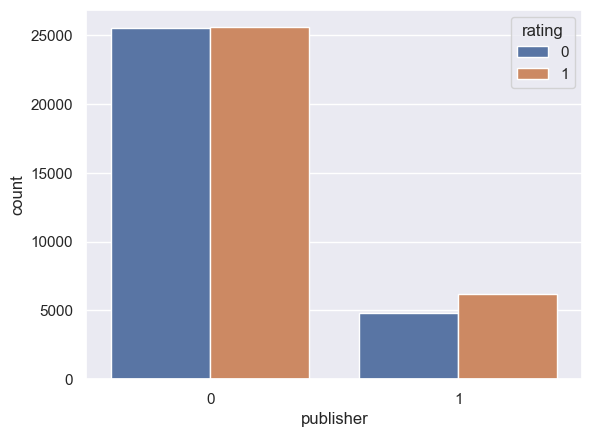

In [9]:
# Group the data by publisher and calculate total ratings for each publisher
publisher_ratings = ML_Set.groupby('publisher')['rating'].sum()

# Sort publisher based on total ratings
top_publisher = publisher_ratings.sort_values(ascending=False).head(250)

# Get the list of top publisher
top_pub = top_publisher.index.tolist()

# Convert 'publisher' column to string type
ML_Set['publisher'] = ML_Set['publisher'].astype(str)

# Mark games developed by top publisher
ML_Set['publisher'] = ML_Set['publisher'].apply(lambda x: any([publisher in x for publisher in top_pub])).astype(int)

# Visualize publisher with total ratings
sns.countplot(x='publisher', hue='rating', data=ML_Set)
plt.show()

## Anlysis:
- X axis: publisher 0 = those that are not popular, publisher 1 = top publishers based on overall number of ratings.
- Based on the plot, more popular publisher tend to have higher ratings (success score of 1 is higher than success score of 0)

# Relationship of the Platform and the Success Score
### Objective:
The objective is to visualize how the number of platforms a game is available on correlates with its total ratings.

### Approach:

**Platform Count Calculation**: The number of platforms for each game is calculated by counting the number of items separated by semicolons in the 'platforms' column.

**Visualization**: A count plot is used to visualize the distribution of games based on the number of platforms they are available on. The hue represents the total ratings, distinguishing between games with "many ratings" and "few ratings".

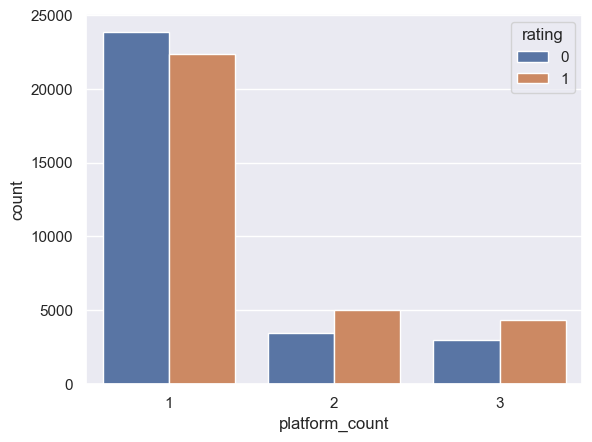

In [10]:
# Calculate the number of platforms for each game
ML_Set['platform_count'] = ML_Set['platforms'].apply(lambda x: len(x.split(';')))

# Visualize the number of platforms with total ratings
sns.countplot(x='platform_count', hue='rating', data=ML_Set)
plt.show()


### Analysis: 
- Games available on a higher number of platforms tend to receive more total ratings.
- Explored previously in EDA, the most used platform is `Windows`
- This could also imply that accessibility across multiple platforms may contribute to increased visibility and popularity, leading to higher ratings.

**Action**:
Developers may consider releasing their games on multiple platforms to potentially increase their audience reach and overall ratings.

# Exploring Genre and Success Score Relationship
**Objective**:
- Understand the correlation between game genres and player ratings.
- Identify trends or patterns indicating which genres attract more attention or higher ratings.

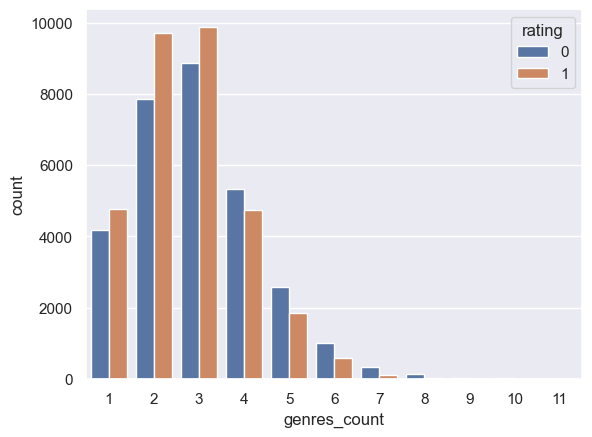

In [11]:
#Genres and total ratings
ML_Set['genres_count'] = ML_Set['genres'].apply(lambda x: len(x.split(';')))
sns.countplot(x='genres_count', hue='rating', data=ML_Set)
plt.show()


### Observation:
**significance of exploring genres**:
- Provides insights into player preferences and market trends.
- Identify popular genres that consistently receive high ratings.
- The part we going to explore is the variation of genres per game may affect higher ratings?

This column may not be as good to use for genre in relation to success score

**Instead of genre:**
We can look at steamspy_tags, which is closely similar to genres. And use steamspy_tags in place of genres as a threshold and further insight.

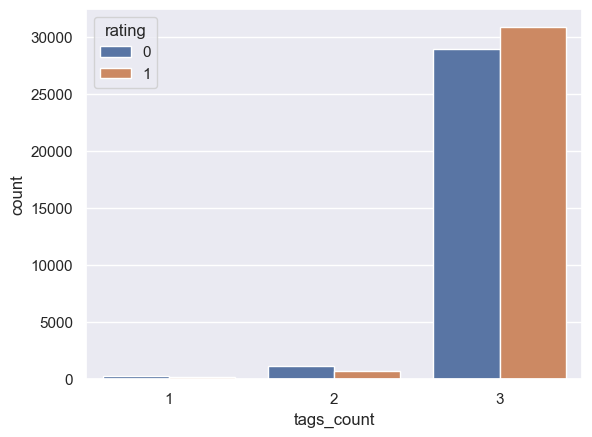

In [12]:
# Look at Steamspy tags and total ratings
ML_Set['tags_count'] = ML_Set['steamspy_tags'].apply(lambda x: len(x.split(';')))
sns.countplot(x='tags_count', hue='rating', data=ML_Set)
plt.show()


### Analysis:
- Games with <= 2 Steamspy tags seem to be more likely to have few reviews
- The steam spy tags hold 1-3 tags, the tags are in the form of `genre`

**significance of exploring genres/steamspytags**:
- Provides insights into player preferences and market trends.
- Identify popular genres that consistently receive high ratings.

# Explore how the `average_playtime` affects Success Score
Examining if games with longer average playtimes tend to have more ratings.

**Approach**:
**Average Playtime**: Analyze whether there's a difference in the distribution of games with longer average playtimes compared to those with shorter playtimes concerning total ratings.
- We use playtime that's greater or equal to 1 becomes 1

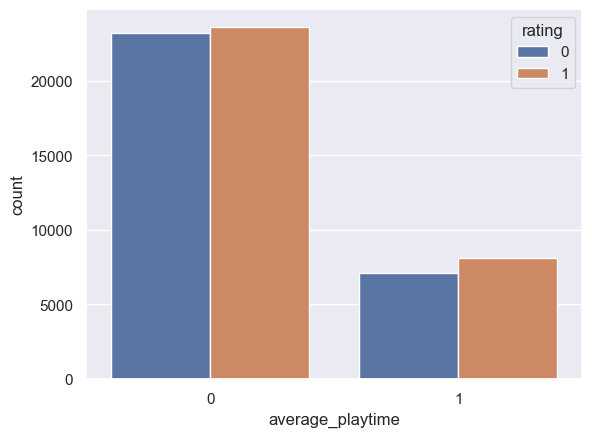

In [13]:
# Average playtime's relationship with total ratings
ML_Set['average_playtime'] = (ML_Set['average_playtime'] >= 1.0).astype(int) #playtime that's greater or equal to 1 becomes 1
sns.countplot(x='average_playtime', hue='rating', data=ML_Set)
plt.show()


### Need more insight:
- Exploring correlations between average playtime and other variables could also provide valuable insights into player behavior and preferences.


# Explore how number of `owners` affect Sucess Score
**Owners to a usable integer format**:
- `owners` is currently an estimated range due to Steam's privacy policy, we can either keep the lower bound, upper bound, or calculate the mid-point value.


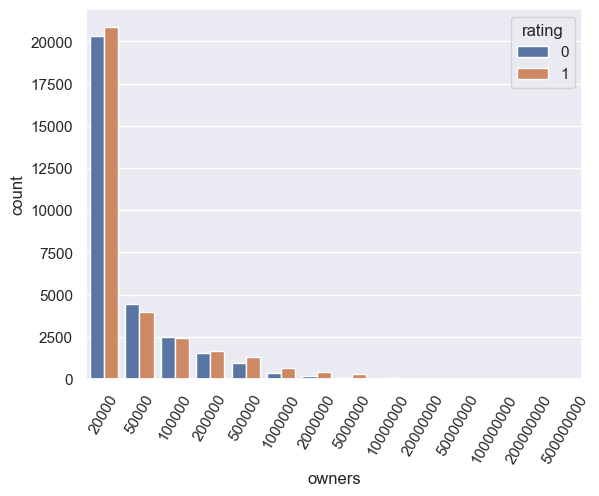

In [14]:
# Take midpoint/upperbound
ML_Set['owners'] = ML_Set['owners'].str.split('-').apply(lambda x: x[1]).astype(int) 

# Rotate the x-axis labels
plt.xticks(rotation=60)  # Adjust the rotation angle as needed

sns.countplot(x='owners', hue='rating', data=ML_Set)
plt.show()

### Observation:
- Majority of the owners fall in the 20,000 or less zone. The "Higher Ratings" appear to be slightly higher than "Lower Ratings"still
- The games with more owners (around 200,000>) is seen to have "Higher Ratings" than "Lower Ratings"

# Binarizing the Relevant Variables :
> ''year', 'developer', 'publisher', 'platform_count', 'categories_count', 'tags_count',
                     'average_playtime', 'median_playtime', 'owners_mid', 'rating'

These are the relevant variables explored that are in relation to ratings which are worth exploring and predicting.
We have explored the relevant variables we want to keep for Modelling.
We move on to Machine Learning and Modelling.

In [15]:
# Binarize the release year, with 2017 as the threshold; every year that's 2017 and before is 1
ML_Set['release_date'] = pd.to_datetime(ML_Set['release_date'])
ML_Set['year'] = ML_Set['release_date'].dt.year
ML_Set['year'] = (ML_Set['year'] <= 2017).astype(int)
ML_Set.drop(['release_date'], axis=1, inplace=True)

#Convert developer column to string type
ML_Set['developer'] = ML_Set['developer'].astype(str)

# Binarize developer data; top 250 developers become 1
ML_Set['developer'] = ML_Set['developer'].apply(lambda x: any([developer in x for developer in top_dev])).astype(int)

#Convert developer column to string type
ML_Set['publisher'] = ML_Set['publisher'].astype(str)

# Binarize developer data; top 250 developers become 1
ML_Set['publisher'] = ML_Set['publisher'].apply(lambda x: any([publisher in x for publisher in top_pub])).astype(int)

# Get a count of the number of supported platforms then binarize the count data; 2+ platforms become 1
ML_Set['platform_count'] = ML_Set['platforms'].apply(lambda x: len(x.split(';')))
ML_Set['platform_count'] = (ML_Set['platform_count'] >= 2).astype(int)
ML_Set.drop(['platforms'], axis=1, inplace=True)

# Get a count of the number of categories listed then binarize the data; 5+ categories become 1
ML_Set['categories_count'] = ML_Set['categories'].apply(lambda x: len(x.split(';')))
ML_Set['categories_count'] = (ML_Set['categories_count'] >= 5).astype(int)
ML_Set.drop(['categories'], axis=1, inplace=True)

# Get a count of the number of Steamspy tags listed then binarize the data; 2+ tags become 1 
ML_Set['tags_count'] = ML_Set['steamspy_tags'].apply(lambda x: len(x.split(';')))
ML_Set['tags_count'] = (ML_Set['tags_count'] <= 2).astype(int)
ML_Set.drop(['steamspy_tags'], axis=1, inplace=True)

# Binarize average playtime; playtime that's greater or equal to 1 becomes 1
ML_Set['average_playtime'] = (ML_Set['average_playtime'] >= 1.0).astype(int)

# Binarize median playtime; playtime that's greater or equal to 1 becomes 1
ML_Set['median_playtime'] = (ML_Set['median_playtime'] >= 1.0).astype(int)

# Binarize number of owners; >20000 owners become 1
ML_Set['owners'] = (ML_Set['owners'] > 20000).astype(int)

# Binarize number of owners; >20000 owners become 1
ML_Set['owners'] = (ML_Set['owners'] > 20000).astype(int)

# Re-order the data frame into the order we want
ML_Set = ML_Set[['year', 'developer', 'publisher', 'platform_count', 'categories_count', 'tags_count',
                     'average_playtime', 'median_playtime', 'owners', 'rating']]


In [16]:
ML_Set.head() 

,year,developer,publisher,platform_count,categories_count,tags_count,average_playtime,median_playtime,owners,rating
0,1,0,0,1,1,0,1,1,0,1
1,1,0,0,1,1,0,1,1,0,1
2,1,0,0,1,0,0,1,1,0,1
3,1,0,0,1,1,0,1,1,0,1
4,1,0,0,1,1,0,1,1,0,1


# Export a CSV file of the binarized data, before feeding it to our models:

In [17]:
ML_Set.to_csv('binary_classified_data.csv')

## We will now use the binary classified data for Model Training

***
# Model Training and Validation

1. **Data Preparation**: Load dataset, split into input and output arrays.
2. **Train-Test Split**: Divide data into training and Test sets. (test is for validation)
3. **Model Selection**: Define a list of models to evaluate.
4. **Cross-Validation**: Iterate through models, perform k-fold cross-validation, print mean accuracy and standard deviation.
5. **Model Evaluation**: Use **Random Forest Classifier** and **AUC** to predict performance

***

# 1 Data Preparation: Import and Load

In [18]:
import pandas as pd
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from warnings import simplefilter

# Get input for model training and validation
ML_data = pd.read_csv('binary_classified_data.csv')
data_array = ML_data.values

# Check the number of columns in the dataset
num_columns = len(ML_data.columns)
print("Number of columns in the dataset:", num_columns)

#view columns
column_names = ML_data.columns.tolist()
print(column_names)



Number of columns in the dataset: 11
['Unnamed: 0', 'year', 'developer', 'publisher', 'platform_count', 'categories_count', 'tags_count', 'average_playtime', 'median_playtime', 'owners', 'rating']



# 2 Train-Test Split: X_train, X_test, y_train, y_test:
**input array** = all variables : year, developer, publisher, platform_count, categories_count, tags_count, average_playtime, median_playtime, owners

**output array** = ratings (last column)

In [19]:
input_array = data_array[:, 1:10] #the rest of teh variables in here
output_array = data_array[:, 10] #ratings is the last column

# Split data into train and validation sets, then each set into input and labels (referred to as output here)
validation_size = 0.20
X_train, X_test, y_train, y_test = model_selection.train_test_split(input_array, output_array, test_size=validation_size, random_state=42)

# 3 List of Models we will briefly view for accuracy:
> **Logistic Regression (LR)**

> **K-Nearest Neighbors (KNN)**

> **Decision Tree (CART)**

> **Naive Bayes (NB)**

> **Random Forest (RFC)**

> **Multi-Layer Perceptron (MLP)**

In [20]:
# List of models
models = [('LR', LogisticRegression(solver='liblinear')),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()), 
          ('NB', GaussianNB()), 
          ('RFC', RandomForestClassifier()),
          ('MLP', MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000))]


# 4 Cross-Validation
Iterate through models, perform k-fold cross-validation, print mean accuracy and (standard deviation).

In [21]:
# K-fold cross-validation with k=10 to evaluate the models using training data
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    mean_accuracy = cv_results.mean()
    std_deviation = cv_results.std()
    message = f"{name}: Accuracy : {mean_accuracy:.4f} (Std : {std_deviation:.4f})"
    print(message)
    


LR: Accuracy : 0.8093 (Std : 0.0051)
KNN: Accuracy : 0.7979 (Std : 0.0420)
CART: Accuracy : 0.8155 (Std : 0.0039)
NB: Accuracy : 0.8050 (Std : 0.0057)
RFC: Accuracy : 0.8153 (Std : 0.0039)
MLP: Accuracy : 0.8146 (Std : 0.0035)


 All of the models give decent accuracy (0.75-0.80+)

Accuracy: 0.8075072188204963
AUC: 0.8229986911489245


Text(67.25, 0.5, 'Train')

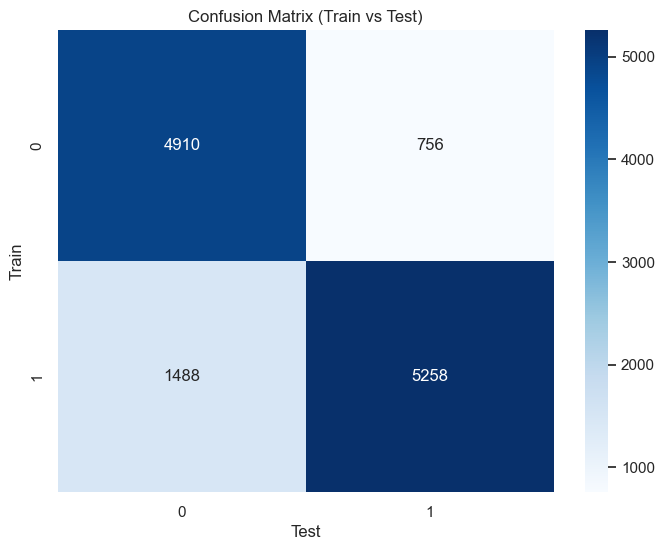

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt

# Gonna use RFC to predict and fit the model
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
predictions = rfc.predict(X_test)

# Print all our evaluation metrics
print("Accuracy:", accuracy_score(y_test, predictions))

# Compute ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:", roc_auc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Train vs Test)")
plt.xlabel("Test")
plt.ylabel("Train")



# 5  Model Evaluation on Validation Set
Model Evaluation: Fit Random Forest Classifier (RFC) on training data, predict on validation set, print accuracy, confusion matrix, and classification report.
- Algorithm tuning:https://medium.com/all-things-ai/in-depth-parameter-tuning-for-random-forest-d67bb7e920d
- Use Area Under Curve (AUC) to evaluate performance

We will use AUC (Area Under Curve) as the evaluation metric. Our target value is binary so it’s a binary classification problem. AUC is a good way for evaluation for this type of problems.


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D
from sklearn.metrics import roc_curve, auc
import numpy as np

# Calculate the baseline performance using this method
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.8229986911489245


## N_estimators:
- Represents the number of trees in the forest.
- Higher number of trees generally leads to better learning of the data.
- However, too many trees can significantly slow down the training process.
- Parameter search is often performed to find the optimal number of trees.



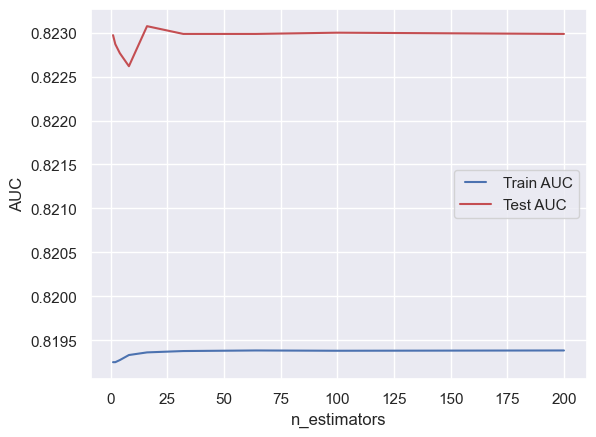

In [24]:
# Tune the number of trees in our forest to see if we can get a better AUC
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]  # Number of trees over a wide range

# For AUC obtained from train set & validation set
train_results = []
validation_results = []

for estimator in n_estimators:
    rfc = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rfc.fit(X_train, y_train)
    train_predictions = rfc.predict(X_train)
    
    # Calculate and add AUC result to the train list
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    validation_predictions = rfc.predict(X_test)
    
    # Calculate and add AUC result to the validation set
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, validation_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    validation_results.append(roc_auc)

# Visualize everything
line1, = plt.plot(n_estimators, train_results, 'b', label='Train AUC')
line2, = plt.plot(n_estimators, validation_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC')
plt.xlabel('n_estimators')
plt.show()

### Max_depth:
- Represents the depth of each tree in the forest.
- Deeper trees have more splits and capture more information about the data.
- Typically, trees are fitted with depths ranging from 1 to 32.
- Training and test errors are plotted to analyze the effect of tree depth on performance.

Both train and test sets are quite similar in trend line for the AUC
- BEWARE of over fitting for deeper depths
- We shall keep an eye on **max_depth 10** (since they stablise around there)

Next we will tune the depth of the trees in our forest
- We will use min sample split parameter The difference between the train & test curves is roughly around  0.004-0.005+ in AUC score.


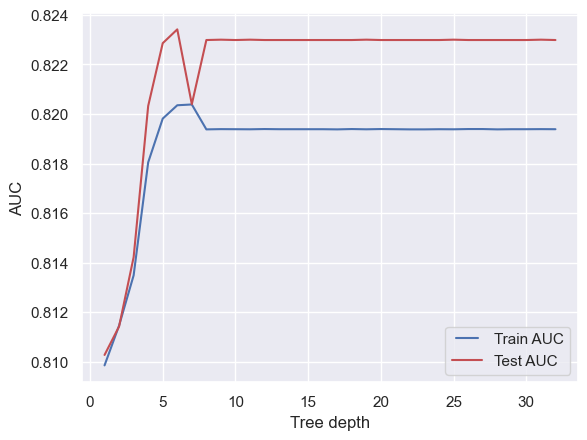

In [25]:
# Now let's tune the min #samples ne
max_depths = np.arange(1, 33)  # Range of depth tested from 1 to 32

train_results.clear()
validation_results.clear()

# Just like before, but with max_depths param instead
for max_depth in max_depths:
    rfc = RandomForestClassifier(max_depth=max_depth, n_jobs=-1)
    rfc.fit(X_train, y_train)
    train_predictions = rfc.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    validation_predictions = rfc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, validation_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    validation_results.append(roc_auc)


line1, = plt.plot(max_depths, train_results, 'b', label='Train AUC')
line2, = plt.plot(max_depths, validation_results, 'r', label='Test AUC')
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC')
plt.xlabel('Tree depth')
plt.show()


## Min_samples_split:
- Represents the minimum number of samples required to split an internal node.
- Can range from considering at least one sample at each node to considering all samples at each node.
- Increasing this parameter constrains each tree in the forest to consider more samples at each node.
- Parameter variation: From 10% to 100% of the samples.

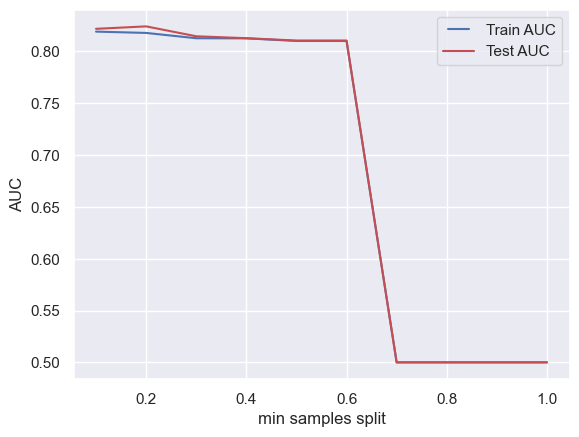

In [26]:
# tuning the min #samples needed to split an internal node
min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)  # Range from 10% to 100% of samples

train_results.clear()
validation_results.clear()

# Same as before, but with min_samples_split param
for min_samples_split in min_samples_splits:
    rfc = RandomForestClassifier(min_samples_split=min_samples_split)
    rfc.fit(X_train, y_train)
    train_predictions = rfc.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    validation_predictions = rfc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, validation_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    validation_results.append(roc_auc)

line1, = plt.plot(min_samples_splits, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_splits, validation_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC")
plt.xlabel("min samples split")
plt.show()

# Min_samples_leaf:
- Represents the minimum number of samples required to be at a leaf node.
- Similar to min_samples_split, but describes the minimum number of samples at the leaf nodes, the base of the tree.
- Constrains the minimum number of samples required to be at a leaf node.
- Helps to prevent overfitting by ensuring that each leaf node has a minimum number of samples.

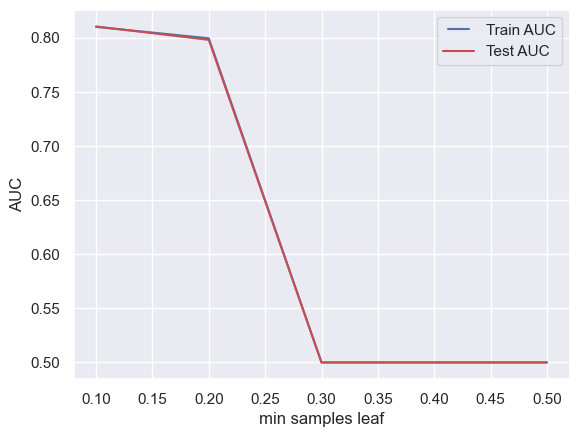

In [27]:
# Performance seems to decrease with higher values of the min sample split, so we can pick 0.1 for this param

# Now tune the min #samples needed in a leaf node
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)  # Range from 10% to 50% of samples

train_results.clear()
validation_results.clear()

# Same as before, but with min_samples_leaf param
for min_samples_leaf in min_samples_leafs:
    rfc = RandomForestClassifier(min_samples_leaf=min_samples_leaf)
    rfc.fit(X_train, y_train)
    train_predictions = rfc.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    validation_predictions = rfc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, validation_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    validation_results.append(roc_auc)

line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, validation_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC")
plt.xlabel("min samples leaf")
plt.show()

## Max Features:
- Represents the number of features to consider when looking for the best split.
- Determines the maximum number of features to consider when splitting a node.
- Can be an integer, float, or "auto".
> - Integer: Considers a fixed number of features.
> - Float: Considers a fraction of total features.
> - "auto": Considers all features.

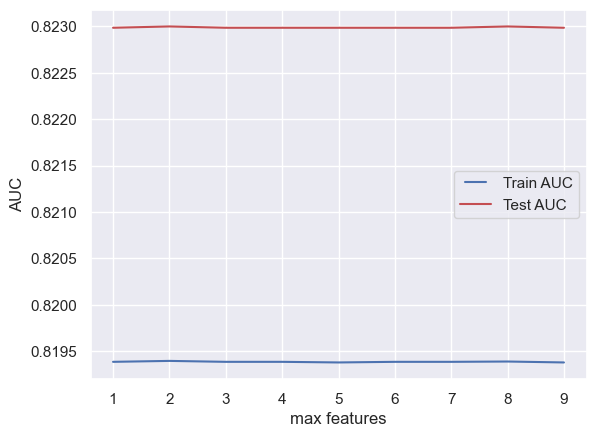

In [28]:
# Similar to min_samples_split, the performance goes down significantly with higher values of the param

# Now let's tune max #features considered when looking for best split
max_features = list(range(1, 10))  # From 1 to max number of features we have (for this data set it's 10)

train_results.clear()
validation_results.clear()

# Same as before but with max_feature param
for max_feature in max_features:
    rfc = RandomForestClassifier(max_features=max_feature)
    rfc.fit(X_train, y_train)
    train_pred = rfc.predict(X_train)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)

    validation_predictions = rfc.predict(X_test)

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, validation_predictions)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    validation_results.append(roc_auc)

line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, validation_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC")
plt.xlabel("max features")
plt.show()

# Based on our findings and estimation, to tune our Model, we should:
### Tune the n_estimators be around 64, max depth 10, min sample split around 0.1, min sample leaf around 0.1, max features 2

Accuracy: 0.8096852723171125
AUC: 0.8095939819850102


Text(67.25, 0.5, 'Train')

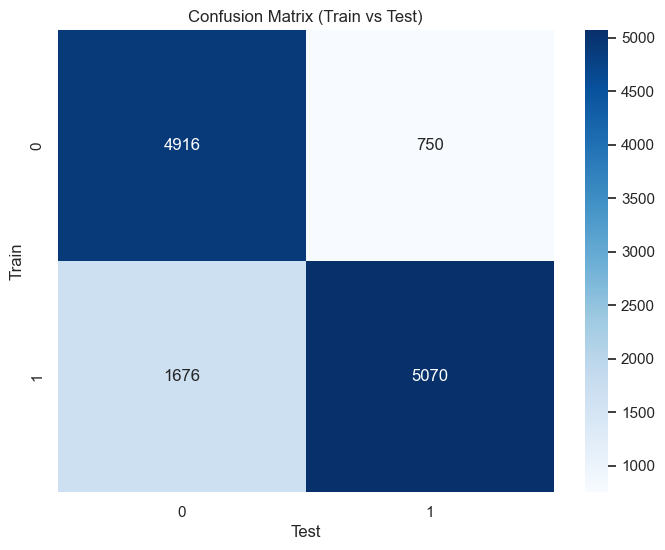

In [29]:
# Put it all together in a final model
rfc_final = RandomForestClassifier(n_estimators=64, max_depth=10, min_samples_split=0.1, 
                                   min_samples_leaf=0.1, max_features=2)
rfc_final.fit(X_train, y_train)
predictions = rfc_final.predict(X_test)

# Print all our evaluation metrics
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

# Compute ROC curve and AUC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("AUC:", roc_auc)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Train vs Test)")
plt.xlabel("Test")
plt.ylabel("Train")

# Conclusion:
- After tuning the model, the improved model only increased in accuracy by a little bit. **(from 0.8075 to 0.8096)**
- Maybe using other algorthims or methods can tune the model and improve accuracy.
- But **~80% accuracy** is pretty good !